In [1]:
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

from xgboost import plot_importance
import numpy as np
from sklearn.metrics import confusion_matrix


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
ds = pd.read_csv("Adult.csv")
ds.shape

(32561, 15)

In [3]:
ds_test = pd.read_csv("Adult_test.csv")
ds_test.shape

(16281, 15)

In [4]:
ds_merged = pd.concat([ds, ds_test])
ds_merged.shape

(48842, 15)

In [5]:
ds_merged = ds_merged.replace(" ?", np.nan)

In [6]:
ds_merged

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [7]:
ds_merged[" Salary"].describe()

count      48842
unique         4
top        <=50K
freq       24720
Name:  Salary, dtype: object

In [8]:
ds_merged[" Salary"].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [9]:
#replacing 1 for salary greater than 50k and 0 for salary lesser than 50k
ds_merged[" Salary"] = ds_merged[" Salary"].replace([' <=50K', ' >50K', ' <=50K.', ' >50K.'],[1, 0, 1, 0])

In [10]:
ds_merged[" Salary"].describe()

count    48842.000000
mean         0.760718
std          0.426649
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name:  Salary, dtype: float64

In [11]:
ds_merged[" fnlwgt"].describe()

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name:  fnlwgt, dtype: float64

In [12]:
ds_merged[" capital-gain"].describe()

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name:  capital-gain, dtype: float64

In [13]:
ds_merged[" capital-loss"].describe()

count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name:  capital-loss, dtype: float64

In [14]:
ds_merged[" fnlwgt"] = (ds_merged[" fnlwgt"] - ds_merged[" fnlwgt"].mean()) / ds_merged[" fnlwgt"].std()
ds_merged[" capital-loss"] = ds_merged[" capital-loss"] / ds_merged[" capital-loss"].max()
ds_merged[" capital-gain"] = ds_merged[" capital-gain"] / ds_merged[" capital-gain"].max()

In [15]:
ds_merged.isna().sum()

age                   0
 workclass         2799
 fnlwgt               0
 education            0
 education-num        0
 marital-status       0
 occupation        2809
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     857
 Salary               0
dtype: int64

In [16]:
ds_merged[" workclass"].describe()

count        46043
unique           8
top        Private
freq         33906
Name:  workclass, dtype: object

In [17]:
ds_merged[" occupation"].describe()

count               46033
unique                 14
top        Prof-specialty
freq                 6172
Name:  occupation, dtype: object

In [18]:
ds_merged[" native-country"].describe()

count              47985
unique                41
top        United-States
freq               43832
Name:  native-country, dtype: object

In [19]:
# Lets  make two copies of the data frame where one data frame contains the data with rows with nan removes
# the other contains the data with the top results replaced with nan
ds_merged_with_nan = ds_merged.copy()
ds_merged_with_out_nan = ds_merged.copy()

In [20]:
ds_merged_with_nan[" workclass"].fillna('Private', inplace=True)
ds_merged_with_nan[" occupation"].fillna('Prof-specialty', inplace=True)
ds_merged_with_nan[" native-country"].fillna('United-States', inplace=True)

In [21]:
ds_merged_with_out_nan = ds_merged_with_out_nan.dropna()

In [22]:
# One Hot encoding for the datas with strings
ds_merged_with_nan = pd.concat([ds_merged_with_nan[["age"," fnlwgt", " education-num", " capital-gain", " capital-loss", " hours-per-week", " Salary"]],
                               pd.get_dummies(ds_merged_with_nan[" workclass"], drop_first = True),
                               pd.get_dummies(ds_merged_with_nan[" education"], drop_first = True),
                               pd.get_dummies(ds_merged_with_nan[" marital-status"], drop_first = True),
                               pd.get_dummies(ds_merged_with_nan[" occupation"], drop_first = True),
                               pd.get_dummies(ds_merged_with_nan[" relationship"], drop_first = True),
                               pd.get_dummies(ds_merged_with_nan[" sex"], drop_first = True),
                               pd.get_dummies(ds_merged_with_nan[" native-country"], drop_first = True)],axis=1)

ds_merged_with_out_nan = pd.concat([ds_merged_with_out_nan[["age"," fnlwgt", " education-num", " capital-gain", " capital-loss", " hours-per-week", " Salary"]],
                               pd.get_dummies(ds_merged_with_out_nan[" workclass"], drop_first = True),
                               pd.get_dummies(ds_merged_with_out_nan[" education"], drop_first = True),
                               pd.get_dummies(ds_merged_with_out_nan[" marital-status"], drop_first = True),
                               pd.get_dummies(ds_merged_with_out_nan[" occupation"], drop_first = True),
                               pd.get_dummies(ds_merged_with_out_nan[" relationship"], drop_first = True),
                               pd.get_dummies(ds_merged_with_out_nan[" sex"], drop_first = True),
                               pd.get_dummies(ds_merged_with_out_nan[" native-country"], drop_first = True)],axis=1)

In [23]:
ds_merged_with_out_nan.shape

(45222, 93)

In [24]:
ds_merged_with_nan.shape

(48842, 97)

In [25]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df, n_pair):
    combos = list(combinations(list(df.columns), n_pair))
    colnames = list(df.columns)+['_'.join(x) for x in combos]
    
    #scaler = MinMaxScaler()
    #scaler.fit(df)
    #df = scaler.transform(df)
    
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    noint_indices = [i for i,x in enumerate(list((df==0).all())) if x]
    df= df.drop(df.columns[noint_indices], axis=1)
    
    return df

In [26]:
###Generating all possible pair of interactions between 2 pair of columns.
##Then removing those columns 


Y_WN = ds_merged_with_nan[" Salary"].copy()
X_WN = ds_merged_with_nan.drop([" Salary"],1)

#X_WN_I = add_interactions(X_WN, 2)
#X_WN_I.shape

#Running the algorithm with the interactions does not yeild any good improvement over than using the standard dataset

In [27]:
Y_WON = ds_merged_with_out_nan[" Salary"].copy()
X_WON = ds_merged_with_out_nan.drop([" Salary"],1)

#X_WON_I = add_interactions(X_WON, 2)
#X_WON_I.shape

In [28]:
X_WN.index = Y_WN.index
X_WN['Salary'] = Y_WN

X_WN_validation = X_WN[32561:]
X_WN = X_WN[0:32561]

Y_WN = X_WN['Salary'].copy()
Y_WN_validation = X_WN_validation['Salary'].copy()
X_WN = X_WN.drop(['Salary'],1)
X_WN_validation = X_WN_validation.drop(['Salary'],1)

In [29]:
X_WON.index = Y_WON.index
X_WON['Salary'] = Y_WON

X_WON_validation = X_WON[32561:]
X_WON = X_WON[0:32561]

Y_WON = X_WON['Salary'].copy()
Y_WON_validation = X_WON_validation['Salary'].copy()
X_WON = X_WON.drop(['Salary'],1)
X_WON_validation = X_WON_validation.drop(['Salary'],1)

In [30]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('MLP', MLPClassifier()))

seed = 7
results = []
names = []
scoring = 'accuracy'


In [31]:
#For without interactions
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_WN, Y_WN, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.850373 (0.005856)


C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\nikhi\Anacond

LDA: 0.841313 (0.005375)
KNN: 0.802954 (0.005639)
CART: 0.816253 (0.004820)
NB: 0.575413 (0.007261)


C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

SVM: 0.834066 (0.005906)
XGB: 0.864470 (0.004410)


C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP: 0.852922 (0.005144)


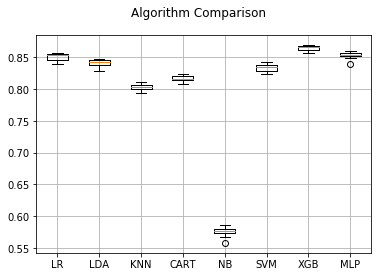

In [32]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.grid(True)
plt.show()

In [34]:
%%time
# As XGBClassifier does better with this data lets train the data with XGB Classifier

###Hypertune the model intensively with a 10 fold cross validation strategy.
##first grid search for max_depth,min_child_weight then fix those and search for rest in same fashion
### parameter scale_pos_weight is quite important in case of imbalanced dataset

param_test= {'min_child_weight':[5],
          'max_depth': [10],
          'n_estimators':[150],
          'scale_pos_weight':[1],
          'colsample_bytree':[0.8], 
          'subsample':[0.8],
          'gamma':[0]}
param_test2 = {
  'min_child_weight':[5,6],
  'max_depth': range(3,10,2),
  'n_estimators':[150,200,300,400],
  'scale_pos_weight':[1,2,3,4],
  'colsample_bytree':[0.7,0.8], 
  'subsample':[0.7,0.8],
  'gamma':[0,0.2,0.4]}


gsearch2b = GridSearchCV(XGBClassifier(), param_test, scoring='accuracy',n_jobs=4,iid=False, cv=10, refit=True)

## use the refit params to get the 
gsearch2b.fit(X_WN, Y_WN)

Wall time: 2min 15s


In [35]:
#print(gsearch2b.cv_results_)
print("gsearch2b.best_params_",gsearch2b.best_params_)
print("gsearch2b.best_score_",gsearch2b.best_score_)

gsearch2b.best_params_ {'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 150, 'scale_pos_weight': 1, 'subsample': 0.8}
gsearch2b.best_score_ 0.8710113974889842


In [36]:
%%time
modelXg = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=10, min_child_weight=5, 
                      gamma=0,nthread=4, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',scale_pos_weight=1,seed=29)
modelXg.fit(X_WN, Y_WN)

Wall time: 10.5 s


In [37]:
%%time
Y_WN_xg = modelXg.predict(X_WN_validation)

Wall time: 146 ms


In [38]:
print(confusion_matrix(Y_WN_validation, Y_WN_xg))
predictions = [value for value in Y_WN_xg]
accuracy = accuracy_score(Y_WN_validation, predictions)
print("Accuracy_score: %.2f%% on Validation dataset" % (accuracy * 100.0))

[[ 2502  1344]
 [  765 11670]]
Accuracy_score: 87.05% on Validation dataset


In [39]:
error = (1 - accuracy)
print("Error in prediction: %.2f%% on Validation dataset" % (error * 100.0))

Error in prediction: 12.95% on Validation dataset


In [40]:
modelXg = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=10, min_child_weight=5, 
                      gamma=0,nthread=4, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',scale_pos_weight=1,seed=29)
modelXg.fit(X_WON, Y_WON)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=5, missing=None, n_estimators=150,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=29, silent=True,
       subsample=0.8)

In [41]:
Y_WON_xg = modelXg.predict(X_WON_validation)

In [42]:
print(confusion_matrix(Y_WON_validation, Y_WON_xg))
predictions = [value for value in Y_WON_xg]
accuracy = accuracy_score(Y_WON_validation, predictions)
print("Accuracy_score: %.2f%% on Validation dataset" % (accuracy * 100.0))

[[2019 1081]
 [ 605 8956]]
Accuracy_score: 86.68% on Validation dataset


In [43]:
error = (1 - accuracy)
print("Error in prediction: %.2f%% on Validation dataset" % (error * 100.0))

Error in prediction: 13.32% on Validation dataset


The model with the nan's replaced by the average or the most freqquent occurance yeilds a better accuracy compared to removing the nan's.


The Following was the error rate that were reported along with the dataset Using MLC++

Following algorithms were later run with the following error rates,
all after removal of unknowns and using the original train/test split.
All these numbers are straight runs using MLC++ with default values.

    Algorithm               Error
    C4.5                    15.54
    C4.5-auto               14.46
    C4.5 rules              14.94
    Voted ID3 (0.6)         15.64
    Voted ID3 (0.8)         16.47
    T2                      16.84
    1R                      19.54
    NBTree                  14.10
    CN2                     16.00
    HOODG                   14.82
    FSS Naive Bayes         14.05
    IDTM (Decision table)   14.46
    Naive-Bayes             16.12
    Nearest-neighbor (1)    21.42
    Nearest-neighbor (3)    20.35
    OC1                     15.04
    Pebls                   Crashed.  Unknown why (bounds WERE increased)

#### The best error that was obtained on the validation data Using the XGB Classifier is 12.95%